# Checkpoint 1: Data science tools and decision trees
---
*Responsible:* Andreas Sogaard (<andreas.sogaard@ed.ac.uk>)

### Notes on the Dataset
* You will be using weather observation data from the UK Met Office Datapoint service
* Ground observations are made hourly at weather stations across the length of the UK 
* The data sample covers data from June this year
* Data collections for each day starts at 6.30pm. All observation data is listed in one day blocks
* The time value column refers to the number of minutes after midnight 
* `Null` values for some features are expected (e.g. Wind Gust)
* Data import and preparation is already provided 

### Notes on the Assessment
* Try and calculate the answers provided. If you are unable to complete the question, describe which approach you _would_ have taken to solve the problem
* Code must be understandable and reproducible. Before grading the notebook kernel _**may**_ be **restarted** and **re-run**
* If you are unsure on how to proceed please reference the two companion notebooks for relevant examples, or **ask one of the TAs**

### Notes on solution
* This CP exercise sheet is divided into three sections, corresponding to parts of the lecture, giving 10 marks in total:
  - Data science tools (Exs. 1–7; 4 Marks)
  - Visualisation (Exs. 8–10; 3 marks)
  - Decision tree classification + ensemble methods (Exs. 11–14; 3 marks)
* Exercises 1-6 can be solved with one line of code while still being legible. _(That's not a weird flex, nor required for full marks, just letting you know that if you find yourself with a 20-line long solution, it can probably be done in a simpler way.)_
* The following `pandas.DataFrame` functions may be useful: `head`, `describe`, `loc`, `query`, `unique`, `sort_values`, `group_by`, `apply`.

## Preamble
---

In [1]:
# Custom import(s)
from daml import plot, utilities

# Make notebook as reproducible as possible
utilities.make_reproducible(21)

c:\users\calum\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\calum\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\calum\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\calum\appd

Making reproducible with seed 21. Please not that running in parallel (e.g. by setting `n_jobs > 1` in certain scikit-learn functions) breaks reproducibility.


In [2]:
# Standard import(s)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

%matplotlib inline

In [3]:
# Make sure that the data file has been downloaded
! if [ ! -f weather.csv ]; then { wget -O weather.csv https://cernbox.cern.ch/index.php/s/qGDDdg1HniDXpM3/download; }; else { ls -l weather.csv; }; fi 

! was unexpected at this time.


In [6]:
# Load in the prepared weather data
obs = pd.read_csv('weather.csv')
obs.head()

,StationID,StationName,Elevation,Latitude,Longitude,Date,Time,Gust,Temperature,Visibility,WindDirection,WindSpeed,Pressure,PressureTrend,DewPoint,Humidity,Type
0,3002,BALTASOUND,15.0,60.749,-0.854,2018-05-31,1020,NaN,16.1,30000.0,E,8.0,1019.0,F,11.6,74.5,0
1,3002,BALTASOUND,15.0,60.749,-0.854,2018-05-31,1080,NaN,14.9,22000.0,E,8.0,1019.0,F,11.8,81.5,0
2,3002,BALTASOUND,15.0,60.749,-0.854,2018-05-31,1140,NaN,14.0,14000.0,E,6.0,1018.0,F,11.6,85.4,0
3,3002,BALTASOUND,15.0,60.749,-0.854,2018-05-31,1200,NaN,12.9,12000.0,ENE,2.0,1019.0,R,11.0,88.1,0
4,3002,BALTASOUND,15.0,60.749,-0.854,2018-05-31,1260,NaN,12.0,9000.0,E,2.0,1019.0,R,10.9,92.9,1


In [7]:
# Drop duplicate measurements -- makes sense in this case, since measurements 
# with identical rows would imply identical dates and times, which *is* indeed
# pathological.
obs = obs.drop_duplicates()

## Data science tools (4 Marks)
---
This section covers 7 exercises on data handling using `pandas.DataFrames`.

#### 1. How many observations have been collected and how many features are listed per observation? **(0.5 Mark)**

In [8]:
print('Observations: {}'.format(obs.shape[0]))
print('Features: {}'.format(obs.shape[1]))

Observations: 102475
Features: 17


#### 2. What are the names of the two observation stations above 60 degrees latitude? **(0.5 Mark)**

_Hints:_
1. Find the measurements with latitude above 60 degrees
2. Find the station names for these measurements
3. Find the unique such station names

In [9]:
filtered_obs = obs[obs['Latitude']>60]
names = filtered_obs.StationName.unique()
for i in names:
    print(i)

BALTASOUND
LERWICK_(S._SCREEN)


#### 3. Where and when was the *hottest* temperature recorded in this month? **(0.5 Mark)**

_Hints:_
1. Sort the rows by temperature
2. Show only the relevant columns
3. Show the first 5 rows

In [10]:
hottest = obs.sort_values('Temperature', ascending = False)
reduced_col = hottest.filter(['StationName','Temperature','Date'])
pd.DataFrame.head(reduced_col,5)

,StationName,Temperature,Date
96489,GLASGOW/BISHOPTON,31.6,2018-06-28
96488,GLASGOW/BISHOPTON,31.3,2018-06-28
96490,GLASGOW/BISHOPTON,31.3,2018-06-28
92608,AVIEMORE,31.0,2018-06-27
96487,GLASGOW/BISHOPTON,30.7,2018-06-28



#### 4. Where and when was the *coldest* temperature recorded in this month? **(0.5 Mark)**

In [11]:
coldest = obs.sort_values('Temperature', ascending = True)
reduced_2 = coldest.filter(['StationName','Temperature'])
pd.DataFrame.head(reduced_2,1)

,StationName,Temperature
71403,CAIRN_GORM_SUMMIT,-1.2


#### 5. Where has the greatest range in temperature on the 15th June? **(0.5 Mark)**

_Hints:_
1. Select only rows for the date in question.
2. Group the data by station name
3. Get the temperature column
4. Get the difference between the maximal and the minimal temperature
5. Sort the differences
6. Show the first 5 rows

In [12]:
june = obs[obs['Date']=='2018-06-15']
pd.DataFrame.head(june,100)

diff = []
stations = []
for i in june.StationName.unique():
    new_df = june[june['StationName']==i]
    maxValue = new_df['Temperature'].max()
    minValue = new_df['Temperature'].min()
    stations.append(i)
    diff.append(maxValue-minValue)
    
    
diff_df = pd.DataFrame(diff,stations,columns = ['Temp Difference'])
final = diff_df.sort_values('Temp Difference',ascending = False)
pd.DataFrame.head(final,5)

    

,Temp Difference
BENSON,15.0
WOBURN,14.4
FARNBOROUGH,14.0
CHARLWOOD,13.3
HOLBEACH,12.7


#### 6. Get the mean temperature for each station over the entire month, and find the mean and standard deviation of this distribution **(0.5 Mark)**

In [13]:
import statistics 

stations = []
means = []

for i in obs.StationName.unique():
    station = obs[obs['StationName']==i]
    temp = station['Temperature']
    mean = temp.mean()
    stations.append(i)
    means.append(mean)
    
mean_dist = sum(means)/len(means)
std = statistics.stdev(means) 

df = pd.DataFrame(stations,means)

print('Mean of Distribution: {}'.format(round(mean_dist,2)))
print('Standard Deviation of Distribution: {}'.format(round(std,2)))
    




Mean of Distribution: 14.85
Standard Deviation of Distribution: 1.81


#### 7. Prepare a smaller `pandas.DataFrame` for visualisation and classification (see instructions below; 1 Mark)

In the next sections, on decision trees and ensemble methods, we will try to classify the weather type --- "clear", "cloudy", and "precipitation" --- based on a subset of the available features:

In [14]:
# define data and features
features = ['WindSpeed', 'Temperature', 'Humidity', 'Elevation']
output   = ['Type']
wtype    = ['Clear', 'Cloudy', 'Precip']  # Corresponding to Type == 0, 1, and 2, resp.
features.append('Type')

Therefore,
* create a `pandas.DataFrame`, called `dataset`, which contains only the desired features and the target variable; 
* drop duplicates and NaN-values; 
* remove all rows which have `Type == 3` (_i.e._ which aren't of either of the three types of weather that we want to classify);
* add a new column called `Class` containing the named weather type, _i.e._ from the options in `wtype`, corresponding  to the value in the `Type` column;
* shuffle the dataframe;
* from `dataset`, create a new `pandas.DataFrame` called `sample`, containing 50 examples of each type of weather;
* from `sample`, extract numpy arrays for the inputs (called `X`) and target (called `y`); 
* flatten `y`; and
* check their shapes to make sure they look alright.

In [15]:
from sklearn.utils import shuffle

#basic data cleaning 
dataset = obs[features]
dataset = dataset.drop_duplicates()
dataset = dataset.dropna()
pd.DataFrame.head(dataset)

#removes all type 3 weather data 
dataset = dataset[dataset['Type']!=3]

Class = []
for i in dataset['Type']:
    if i ==0:
        Class.append('Clear')
    if i ==1:
        Class.append('Cloudy')
    if i ==2:
        Class.append('Precip')
        
#creates a new column for class variable using same index as dataset
dataset['Class'] = pd.Series(Class, index=dataset.index)

#loops over the three weather types and samples 50 data points for each which are appended to sample 
sample = pd.DataFrame(columns = features)
for i in wtype:
    new_df = dataset[dataset['Class']==i]
    a = new_df.sample(n=50)
    sample = sample.append(a)

    #shuffles new dataset
sample = shuffle(sample)

#define new features2 which is same as features minus type
features2 = ['WindSpeed', 'Temperature', 'Humidity', 'Elevation']
x = np.array(sample[features2])
y = np.array(sample['Type'])
x_df = sample[features2]
y = y.flatten()
print(x.shape)
print(y.shape)

(150, 4)
(150,)


c:\users\calum\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


## Visualisation (3 Marks)
---
This section covers 3 exercises on visualisation using `matplotlib.pyplot`. Please complete the first two exercises in this section without the use of the provided plotting methods in `daml/plot.py`.

#### 8. Make a histogram of the average temperature, across the entire month, for each station, categorised by the three weather types considered (1 Mark)

First, we'll define a new `pandas.DataFrame` containing the mean temperature for each station over the entire month, categorised by weather type, for the three weather types considered; much like in Exercise 0, just with an added categorisation by `Type`. 

In [16]:
group = obs.query('Type < 3').groupby(['Type', 'StationName']).Temperature.mean().reset_index()
group.head()

,Type,StationName,Temperature
0,0,ABERDARON,16.178061
1,0,ABERDEEN_AIRPORT,14.956250
2,0,ABERPORTH,16.550974
3,0,ABOYNE,16.175325
4,0,ALBEMARLE,15.163025


* Choose appropriate binning, e.g. using `np.linspace`, and use same binning for all three histograms.
* Loop over the unique, considered weather types.
* Make the histograms using the `plt.hist` method.
* Make the distributions legible, either by setting the opacity (`alpha=...`) or by using an unfilled histogram (`histtype='step'`).
* Label both axes, including units.
* Include a legend for the three weather types.
* Discuss the figure.

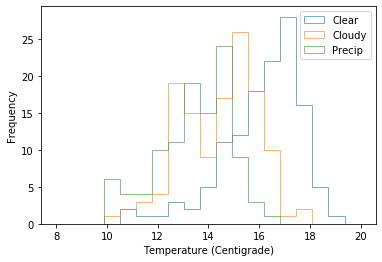

,Elevation,Humidity,Temperature,WindSpeed
count,150.000000,150.000000,150.000000,150.000000
mean,103.420000,77.437333,14.976667,8.926667
std,90.098996,16.998206,4.117428,5.812618
min,2.000000,29.300000,8.000000,1.000000
25%,23.500000,69.125000,11.925000,5.000000
50%,81.000000,81.800000,14.250000,7.500000
75%,146.000000,90.250000,17.875000,11.000000
max,348.000000,100.000000,27.300000,37.000000


In [27]:
for i in group.Type.unique():
    to_plot = group[group['Type']==i]
    plt.hist(to_plot['Temperature'],bins = np.linspace(8,20,20),alpha = 0.6,histtype = 'step')
    
plt.xlabel('Temperature (Centigrade)')
plt.ylabel('Frequency')
plt.legend([wtype[0],wtype[1],wtype[2]])
plt.show()

#Discussion in markdown below 

Info from plots:
-Temperature is most frequantly 17 on clear days, 15 on cloudy days and 14 on days with precipitation
-Each distribution of temperature is roughly a gaussian which is expected 
-There is a lot of overlap in temperatures on cloudy and rainy days 


#### 9. Make a scatter plot of the average temperature and the average wind speed, across the entire month, for each station, categorised by the three weather types considered (1 Mark)

* Define a new `pandas.DataFrame` analogously to the one in Exercise 8, which includes wind speed in addition to temperature.
* Loop over the unique, considered weather types.
* Make the scatter plots using the `plt.scatter` method.
* Consider changing the opacity to make the plot more legible.
* Label both axes, including units.
* Include a legend for the three weather types.
* Discuss the figure.

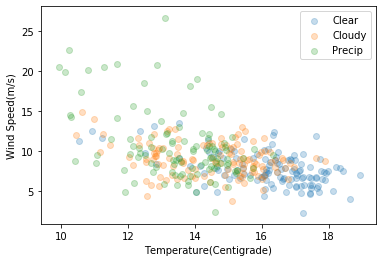

In [18]:
group1 = obs.query('Type < 3').groupby(['Type', 'StationName']).Temperature.mean().reset_index()
group2 = obs.query('Type < 3').groupby(['Type', 'StationName']).WindSpeed.mean().reset_index()

windspeed = group2['WindSpeed']
group1['WindSpeed'] = windspeed
group1.head()

for i in group1.Type.unique():
    to_plot = group1[group1['Type']==i]
    plt.scatter(to_plot['Temperature'], to_plot['WindSpeed'],alpha = 0.25)
    
plt.xlabel('Temperature(Centigrade)')
plt.ylabel('Wind Speed(m/s)')
plt.legend([wtype[0],wtype[1],wtype[2]])
plt.show()

#Discussion in markdown below 


Based on the more outlying points in the top lefth, high wind speed in combination with low temperature would appear to suggest precipitation. On the other end of the plot, at the majoritively blue cluster at the bottom right, high temp and low wind speed seems to normally be indicators of clear weather. Both of these observations make logical sense.

The data overlaps a lot in general, however especially in the center region, with wind speed between 5 and 15 and temperature between 12 and 16.

#### 10. Make a grid plot of all feature histograms and pair-wise scatter plot combinations for the 4 features used (1 Mark)
* Use the `plot.pair_grid` method to study the features in `sample`, defined in Exercise 7. The methods accepts either a `pandas.DataFrame` and a string (target column name) as its first two arguments; or two numpy arrays (feature array and target vector).

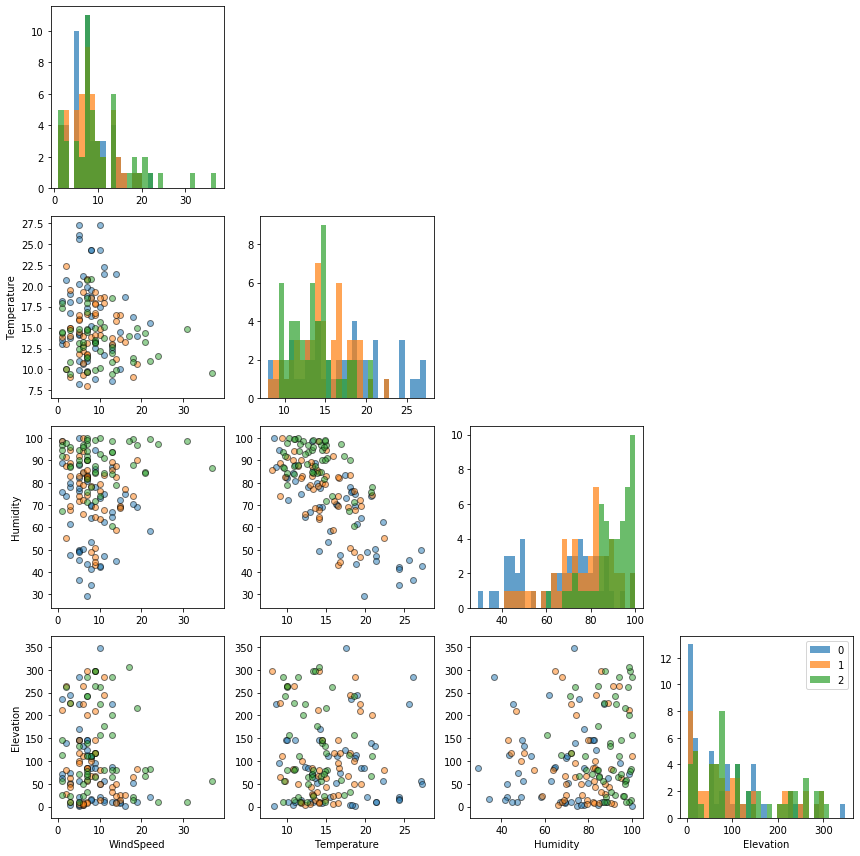

In [20]:
fig = plot.pair_grid(sample[features],'Type')

#Discussion in markdown below 

Plots show scatter plots of variables versus one another where if a variables meets itself in the set of plots, a distribution of its values is plotted.

Some basic info:
-Temperature values are much more frequntly around 5-15 degrees
-Wind speed values are much more frequant in the 0-15 m/s range 
-Humidity seems to be highly correlated to temperature, creating a fairly convincing linear relationship 

-There are some points further out in pretty much every distribution. However none of these seem unphysical or unreasobale as actual data points.

## Decision tree classification (3 Marks)
---
This section covers 4 exercises on the use and understanding of (boosted) decision trees.

#### 11. Fit a decision tree classifier (1 Mark)

* Fit an `sklearn.tree.DecisionTreeClassifier` to the feature array `X` and target array `y` defined in Exercise 7. 
  - Set the maximum tree depth to 4.
  - Leave the remaining parameters at their default values.
* Make plots of all pairs of features in the fitted dataset using the `plot.pair_grid` method (see Exercise 10), and overlay the decision contour of the classifier by specifying the `clf=...` argument. Use either the `Type` or `Class` column as the `target=...` argument.
* Discuss the characteristics of this type of machine learning model, and how they are evident in the plot.

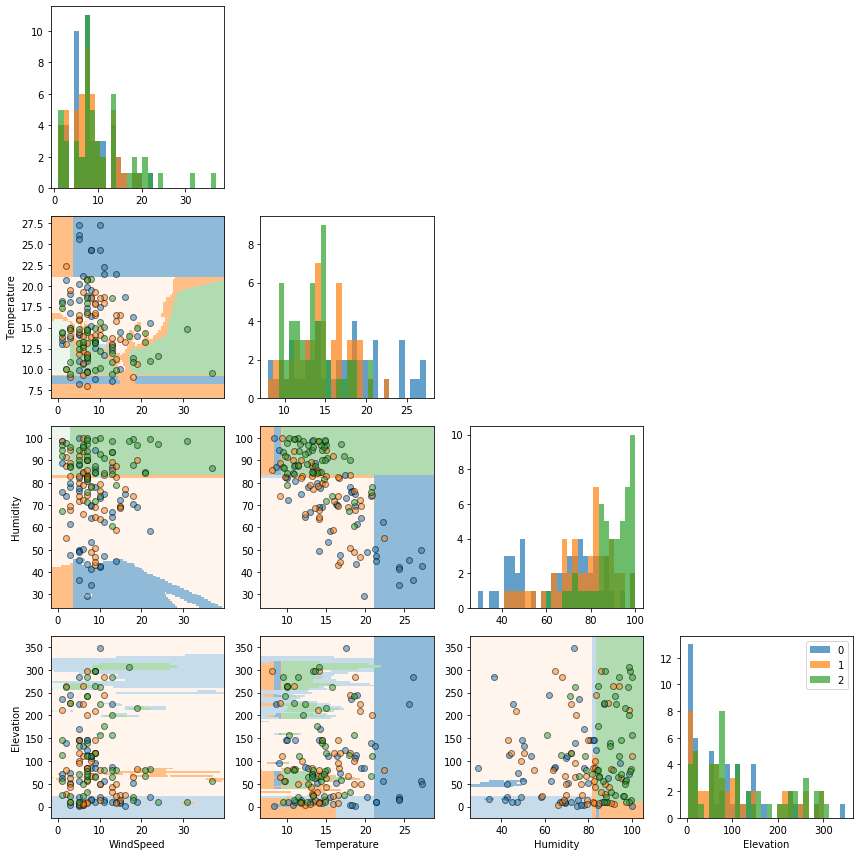

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier

max_depth    =  4
y = y.astype('int')

dt = DecisionTreeClassifier(max_depth=max_depth)
dt.fit(x, y)

fig2 = plot.pair_grid(sample[features], 'Type',clf = dt)

#Discussion in markdown below 


The single decision tree shows quite significant overfitting and reliance on individual points that may not be present in other similar distributions. This means that that the classifier would likely wrongly classify some more data if another similar dataset was used, leading to an overall lower accuracy. The colours of quite a lot of the fitting areas with a fair quantity of points are fairly strong/vibrant meaning that the classifier is more confident in its predictions, this is another sign of overfitting.

#### 12. Illustrate the decision tree classifier logic (1 Mark)

* Use the `plot.tree` method to show the learned logic of the decision tree classifier in Exercise 11.
* Discuss the results: Do the results look reasonable? Can you identy any potential problems with the classifier? How can they be mitigated?

_Hint:_ See `lecture2.ipynb`.

In [23]:
from IPython.display import Image
graph = plot.tree(dt, x_df.columns, wtype)
Image(graph.create_png())

#Discussion in markdown below 

InvocationException: GraphViz's executables not found

In general the tree looks reasonable with the predictions expanding and becoming more diverse. 

General overfitting can be mitigated by using other methods such as Adaboosting and/or random forests.

#### 13. Fit an AdaBoost classifier (0.5 Mark)

* Fit an `sklearn.ensemble.AdaBoostClassifier` to the feature array `X` and target array `y` defined in Exercise 7. 
  - Set the maximum tree depth to 4.
  - Set the number of estimators to 30.
  - Leave the remaining parameters at their default values.
* Make plots of all pairs of features in the fitted dataset using the `plot.pair_grid` method (see Exercise 10), and overlay the decision contour of the classifier by specifying the `clf=...` argument. Use either the `Type` or `Class` column as the `target=...` argument.
* Discuss the characteristics of this type of machine learning model, and how they are evident in the plot.

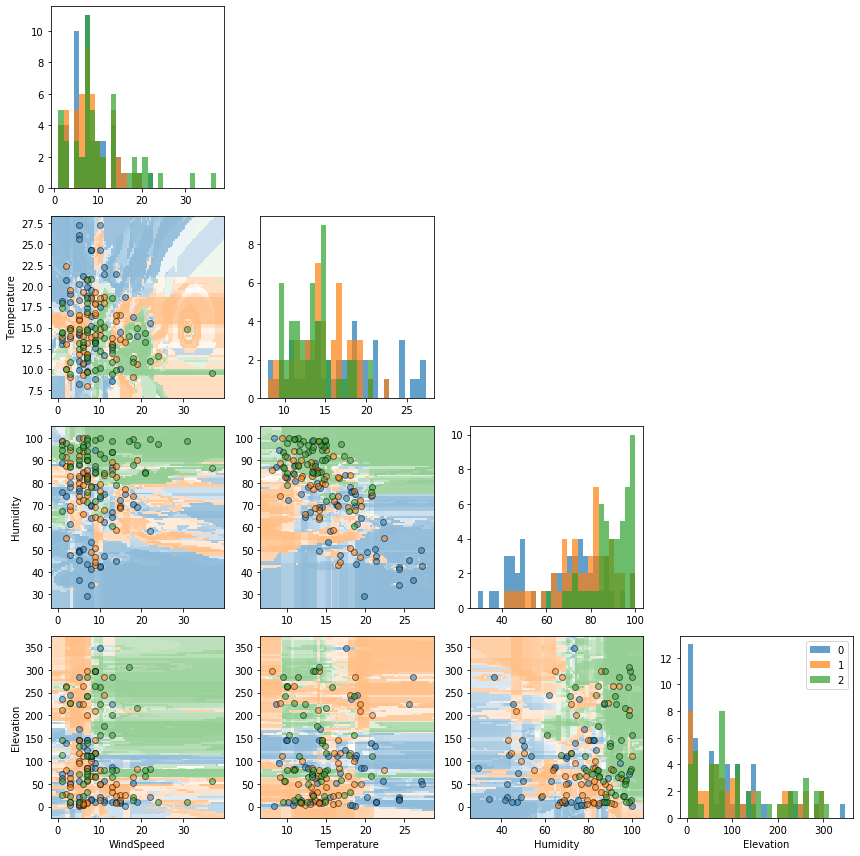

In [24]:
n_estimators = 30
max_depth = 4

ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=max_depth),
                         n_estimators=n_estimators)
ada.fit(x, y)
fig3 = plot.pair_grid(sample[features], 'Type',clf = ada)

Adaboosted classifiers use the previous mistakes of the last decision tree and iteratively improves.This is done by increasing the weights of points that were previously incorrectrly classified.

The contours are less vibrant meaning there is less certainity and quite likely, less overfitting than its classical single decision tree counterpart.

#### 14. Fit a random forst classifier (0.5 Mark)

* Fit an `sklearn.ensemble.RandomForestClassifier` to the feature array `X` and target array `y` defined in Exercise 7. 
  - Set the maximum tree depth to 4.
  - Set the number of estimators to 30.
  - Leave the remaining parameters at their default values.
* Make plots of all pairs of features in the fitted dataset using the `plot.pair_grid` method (see Exercise 10), and overlay the decision contour of the classifier by specifying the `clf=...` argument. Use either the `Type` or `Class` column as the `target=...` argument.
* Discuss the characteristics of this type of machine learning model, and how they are evident in the plot.

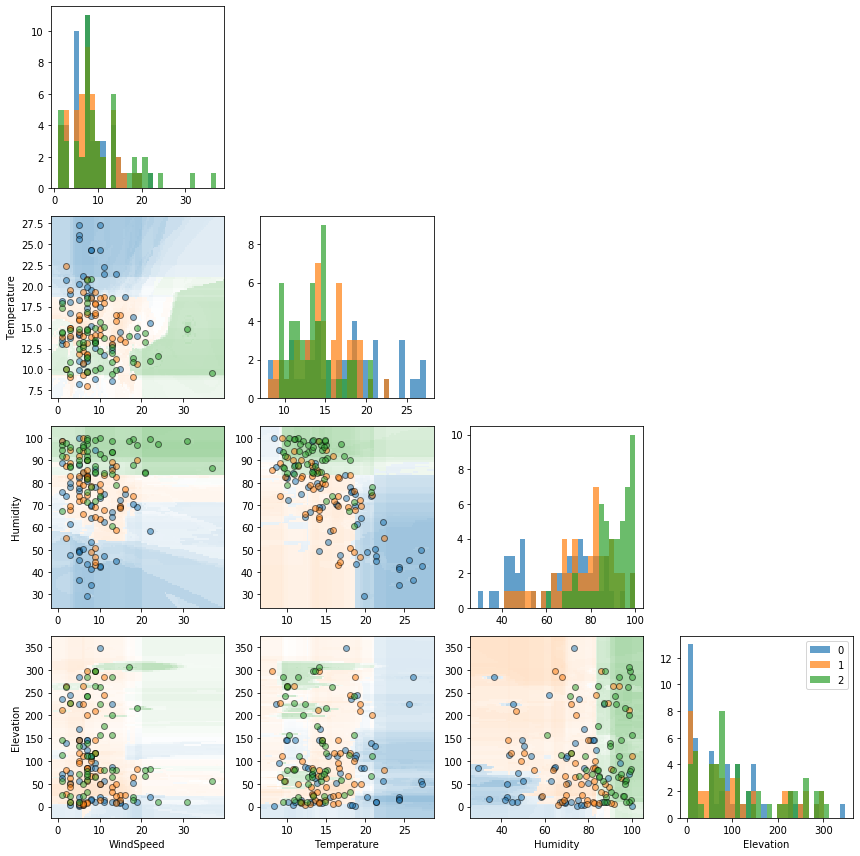

In [25]:
n_estimators = 30
max_depth = 4

ran = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
ran.fit(x, y)

fig4 = plot.pair_grid(sample[features], 'Type',clf = ran)



The random forest classifier uses a subset selection of points each decision tree created and fit. This prevents overbearing on individual points and/or small clusters and leads to a much less overfitted model, as evident by the much more faded contours on the contours plots.